First of all we will do a model exploration in a base case (no policies implemented); <br/>
Next we will do a model exploration with random policies; <br/>
after a sensitivity and vulnerability analysis will be done; <br/>
at last a Optimization will be run to find optimal solutions. <br/>

# Model exploration

In [2]:
# initialize for this run
import os.path
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import ema_logging, MultiprocessingEvaluator
from ema_workbench import Model, RealParameter, ScalarOutcome, CategoricalParameter, IntegerParameter, BooleanParameter, Policy
from ema_workbench.em_framework.samplers import sample_uncertainties
from dike_model_function import DikeNetwork
from ProblemFormulationSelf import problem_definition
from ema_workbench import save_results
from ema_workbench.util.utilities import load_results
from helper import Helper
helper = Helper()
ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
dike_model, planning_steps = problem_definition('all vars')

policies_0 = [Policy('no policy', **{l.name: 0 for l in dike_model.levers})]
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_0 = evaluator.perform_experiments(scenarios = 1000, policies = policies_0)

save_results(all_results_0, './data/exp/nopol1000scen.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1000 scenarios * 1 policies * 1 model(s) = 1000 experiments
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] 500 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 700 cases completed
[MainProcess/INFO] 800 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz


In [4]:
# Ensure variable is defined
try:
    all_results_0
except NameError:
    all_results_0 = None

# Test whether variable is defined to be None
if all_results_0 is None:
    all_results_0 = load_results('./data/exp/nopol1000scen.tar.gz')
    experiments_0, outcomes_0 = all_results_0


[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/nopol1000scen.tar.gz


### grand plot with all variables in it; Very unclear. 

In [9]:
sns.set(style="ticks", color_codes=True)
all_data_0 = pd.DataFrame.from_dict(outcomes_0)
sns.pairplot(data, vars=list(outcomes_0.keys()), diag_kind='hist')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa8e852a0d0> (for post_execute):


KeyboardInterrupt: 

### smaller plot; Way clearer. 

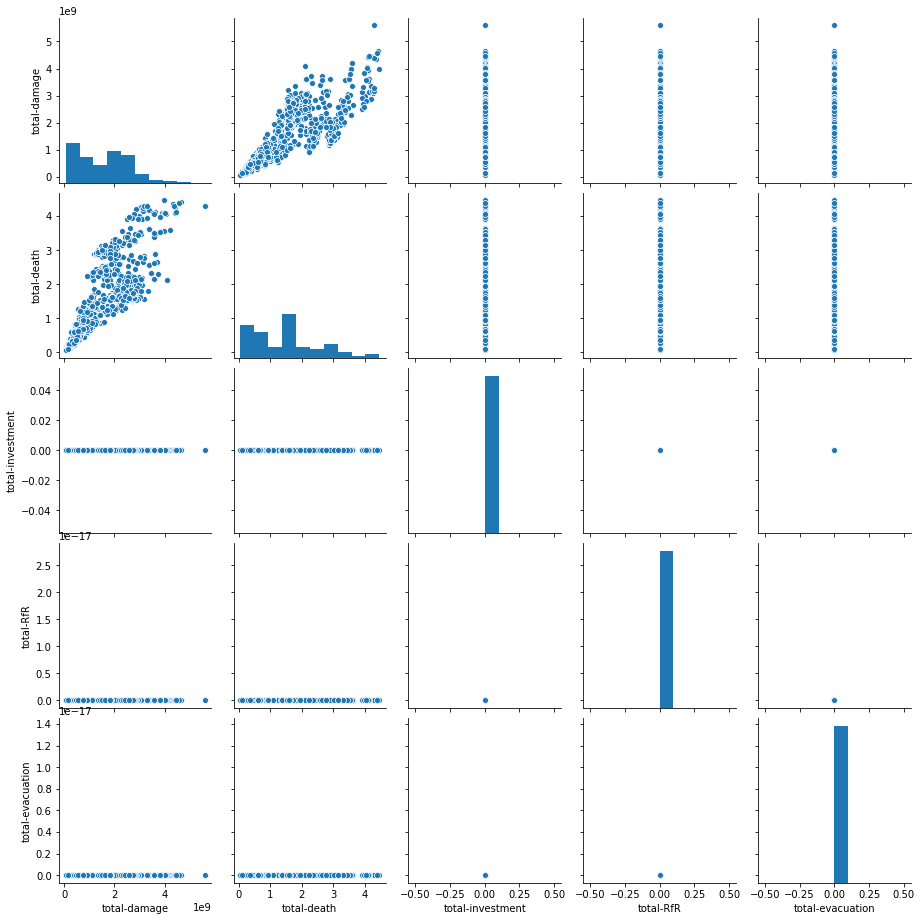

In [8]:
data = pd.DataFrame.from_dict(outcomes_0)

dam_list = data.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data['total-damage'] = data[dam_list].sum(axis=1)
data.drop(columns=dam_list, inplace=True)
death_list = data.filter(like='Deaths').columns
data['total-death'] = data[death_list].sum(axis=1)
data.drop(columns=death_list, inplace=True)
invest_list = data.filter(like='Investment').columns
data['total-investment'] = data[invest_list].sum(axis=1)
data.drop(columns=invest_list, inplace=True)
rfr_list = data.filter(like='RfR').columns
data['total-RfR'] = data[rfr_list].sum(axis=1)
data.drop(columns=rfr_list, inplace=True)
evac_list = data.filter(like='Evacuation').columns
data['total-evacuation'] = data[evac_list].sum(axis=1)
data.drop(columns=evac_list, inplace=True)

# new_outcomes = {col:np.array(data[col].tolist()) for col in data.columns} 
# print(data.head())
sns.pairplot(data, vars=list(data.columns), diag_kind='hist')
plt.show()

[MainProcess/INFO] no time dimension found in results


run with 10 ramdom policies

In [9]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    all_results_r10 = evaluator.perform_experiments(scenarios=10000,               #500
                                            policies=10,
                                            uncertainty_sampling='mc', reporting_interval=10000)

from ema_workbench import save_results

save_results(all_results_r10, './data/exp/mc10pol10000scen.tar.gz')

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.094582e+07,0.038356,2.727952e+07,0.027808,1.742046e+07,0.033337,1.054218e+07,0.005985,2.406315e+08,0.227915,0.0,0.0
1,2.195438e+08,0.125752,8.626318e+07,0.065485,5.439873e+07,0.079584,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
2,6.579547e+06,0.006079,4.313936e+08,0.480962,5.851649e+08,1.263215,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
3,2.205500e+09,1.726188,0.000000e+00,0.000000,7.482219e+07,0.147622,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0
4,8.789173e+07,0.093068,8.718292e+07,0.120338,3.829385e+07,0.101135,0.000000e+00,0.000000,5.967699e+08,0.769028,0.0,0.0


In [22]:
try:
    all_results_10
except NameError:
    all_results_10 = None

# Test whether variable is defined to be None
if all_results_10 is None:
    all_results_r10 = load_results('./data/exp/mc10pol10000scen.tar.gz')
    experiments_r10, outcomes_r10 = all_results_r10

[MainProcess/INFO] results loaded succesfully from /home/jovyan/work/final assignment/data/exp/mc10pol10000scen.tar.gz


In [23]:
data_r10 = pd.DataFrame.from_dict(outcomes_r10)

dam_list = data_r10.filter(like='Damage').columns
# print(data.filter(like='Damage').columns)
data_r10['total-damage'] = data_r10[dam_list].sum(axis=1)
data_r10.drop(columns=dam_list, inplace=True)
death_list = data_r10.filter(like='Deaths').columns
data_r10['total-death'] = data_r10[death_list].sum(axis=1)
data_r10.drop(columns=death_list, inplace=True)
invest_list = data_r10.filter(like='Investment').columns
data_r10['total-investment'] = data_r10[invest_list].sum(axis=1)
data_r10.drop(columns=invest_list, inplace=True)
rfr_list = data_r10.filter(like='RfR').columns
data_r10['total-RfR'] = data_r10[rfr_list].sum(axis=1)
data_r10.drop(columns=rfr_list, inplace=True)
evac_list = data_r10.filter(like='Evacuation').columns
data_r10['total-evacuation'] = data_r10[evac_list].sum(axis=1)
data_r10.drop(columns=evac_list, inplace=True)


In [32]:
# TODO @Hongxuan please see this weird as problem. You have to run an empty cell to make it show something ;PPP
from ema_workbench.analysis import pairs_plotting

new_outcomes_r10 = {col:np.array(data_r10[col].tolist()) for col in data.columns}
fig, ax = pairs_plotting.pairs_scatter(experiments_r10, new_outcomes_r10, group_by='policy', legend=True)
fig.set_size_inches([12, 12])

[MainProcess/INFO] no time dimension found in results


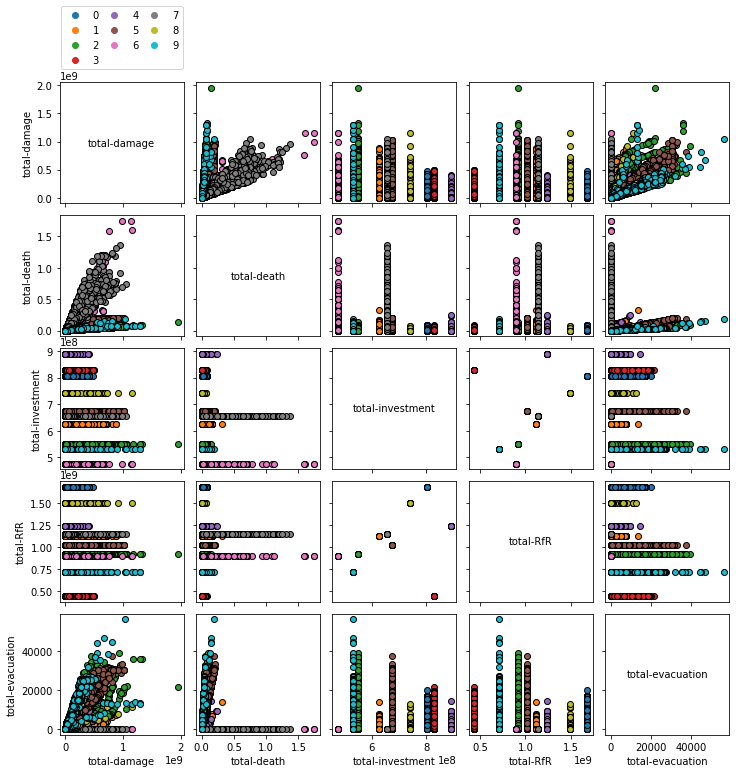

In [29]:
# run this to see picture of the above

<ipython-input-31-8238f678f0ee>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax4 = plt.subplot(223)


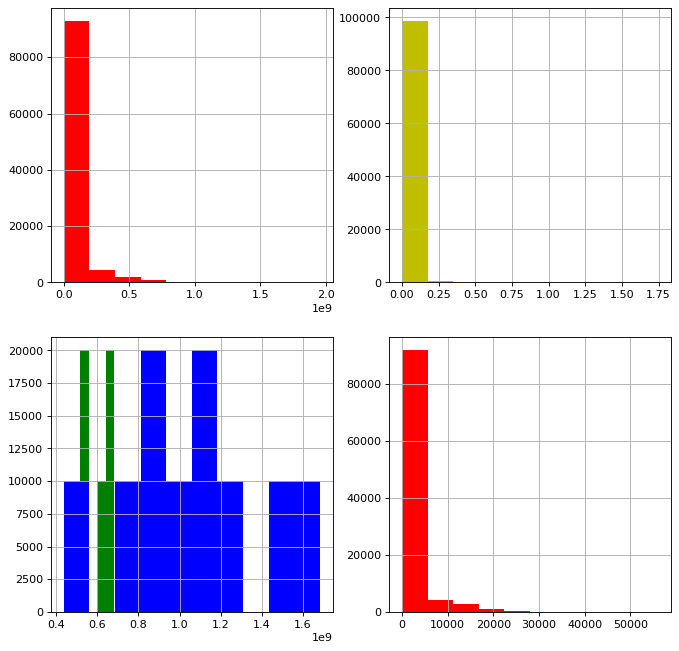

In [31]:
import matplotlib.pyplot as plt # TO DO; plot the scalers.

plt.figure(figsize=(10,10), dpi=80)
plt.figure(1)
ax1 = plt.subplot(221)
data_r10['total-damage'].hist(color="r")
ax2 = plt.subplot(222)
data_r10['total-death'].hist(color="y")
ax3 = plt.subplot(223)
data_r10['total-investment'].hist(color="g")
ax4 = plt.subplot(223)
data_r10['total-RfR'].hist(color="b")
ax5 = plt.subplot(224)
data_r10['total-evacuation'].hist(color="r")

# Vulnerability & sensitivity Analysis